In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [383]:
# tets
rootdir  = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz'
dir_exp = 'TumorNormal_Ki67_modelTNE1977'
outfilename = 'TumorNormal_Ki67_modelTNE1977_Results.txt'

In [384]:
def get_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table.csv'
    df_ = pd.read_csv(path_)
    return df_

In [385]:
def get_train_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table_train.csv'
    df_ = pd.read_csv(path_)
    return df_

In [386]:
df = pd.DataFrame()
df_ = get_df(rootdir, dir_exp)
df = df.append(df_)
df['Set'] = ['Test'] * df.shape[0]

In [387]:
df_tr = pd.DataFrame()
df_ = get_train_df(rootdir, dir_exp)
df_tr = df_tr.append(df_)
df_tr['Set'] = ['Train'] * df_tr.shape[0]

In [388]:
df_all = df.append(df_tr)

In [389]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,1.972825,1.457782,Test
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.109298,1.407057,Test
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.084627,1.432211,Test
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.061749,1.549255,Test
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.136374,1.480252,Test


In [390]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-3])
df_all['TNEID'] = sample_id

In [391]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-2])
df_all['Class'] = sample_id

In [392]:
mean_train = df_all.loc[(df_all['Set'] == 'Train') , 'MaxScoreAnomalyMap'].mean()
df_all['MSE'] = (mean_train - df_all['MaxScoreAnomalyMap'])**2

In [393]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,1.972825,1.457782,Test,TNE1977,Normal,0.052859
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.109298,1.407057,Test,TNE1977,Normal,0.008731
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.084627,1.432211,Test,TNE1977,Normal,0.013950
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.061749,1.549255,Test,TNE1977,Normal,0.019877
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,0,2.136374,1.480252,Test,TNE1977,Normal,0.004404


In [394]:
df_all.index = range(df_all.shape[0])

In [395]:
df_all.loc[df_all['Class']== 'Normal', 'BinaryLabels'] = 0
df_all.loc[df_all['Class']== 'Tumoral', 'BinaryLabels'] = 1

In [396]:
df_all.loc[df_all['Class']== 'Normal', 'binary_lab'] = 1
df_all.loc[df_all['Class']== 'Tumoral', 'binary_lab'] = 0

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

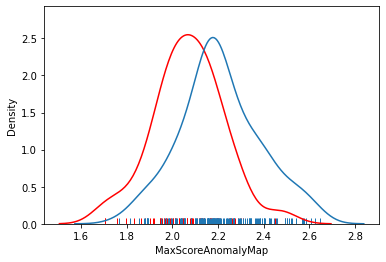

In [397]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

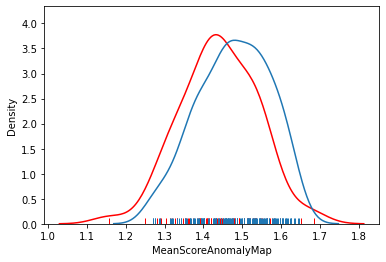

In [398]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

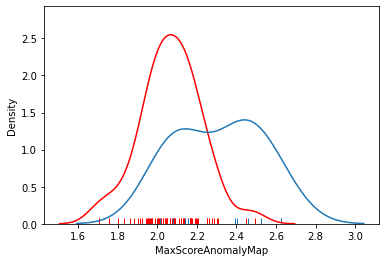

In [399]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

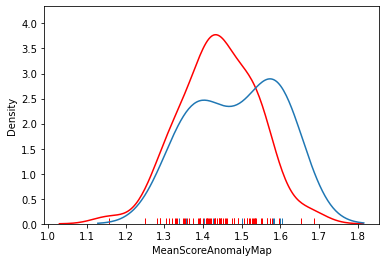

In [400]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

In [401]:
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap']))
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap']))


0.7960199004975124
0.6318407960199004


In [402]:
with open(outfilename, 'a') as f:
    f.write('DET ROC-AUC scores for MaxScoreAnomalyMap : {:.2f} \n'.format(
        roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap'])))
    f.write('DET ROC-AUC scores for MeanScoreAnomalyMap : {:.2f}\n'.format(
        roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap'])))
    f.close()

In [403]:
set(df_all_test[df_all_test['Set'] == 'Test']['TNEID'])

{'TNE1977'}

In [404]:
tne_l =[]
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    tne_l.append(tne)
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    nb_tumor.append(df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    print('Max ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
  
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['TNEID'] = tne_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean

roc_table.to_csv('roc_table_tumor_normal.csv')

TNEID =  TNE1977
Normal  67
Tumor  9
Max  0.7960199004975124
MEan  0.6318407960199004
############################### 



In [405]:
roc_table.head()

,TNEID,nb_normal,nb_tumor,roc_max,roc_mean
0,TNE1977,67,9,0.79602,0.631841


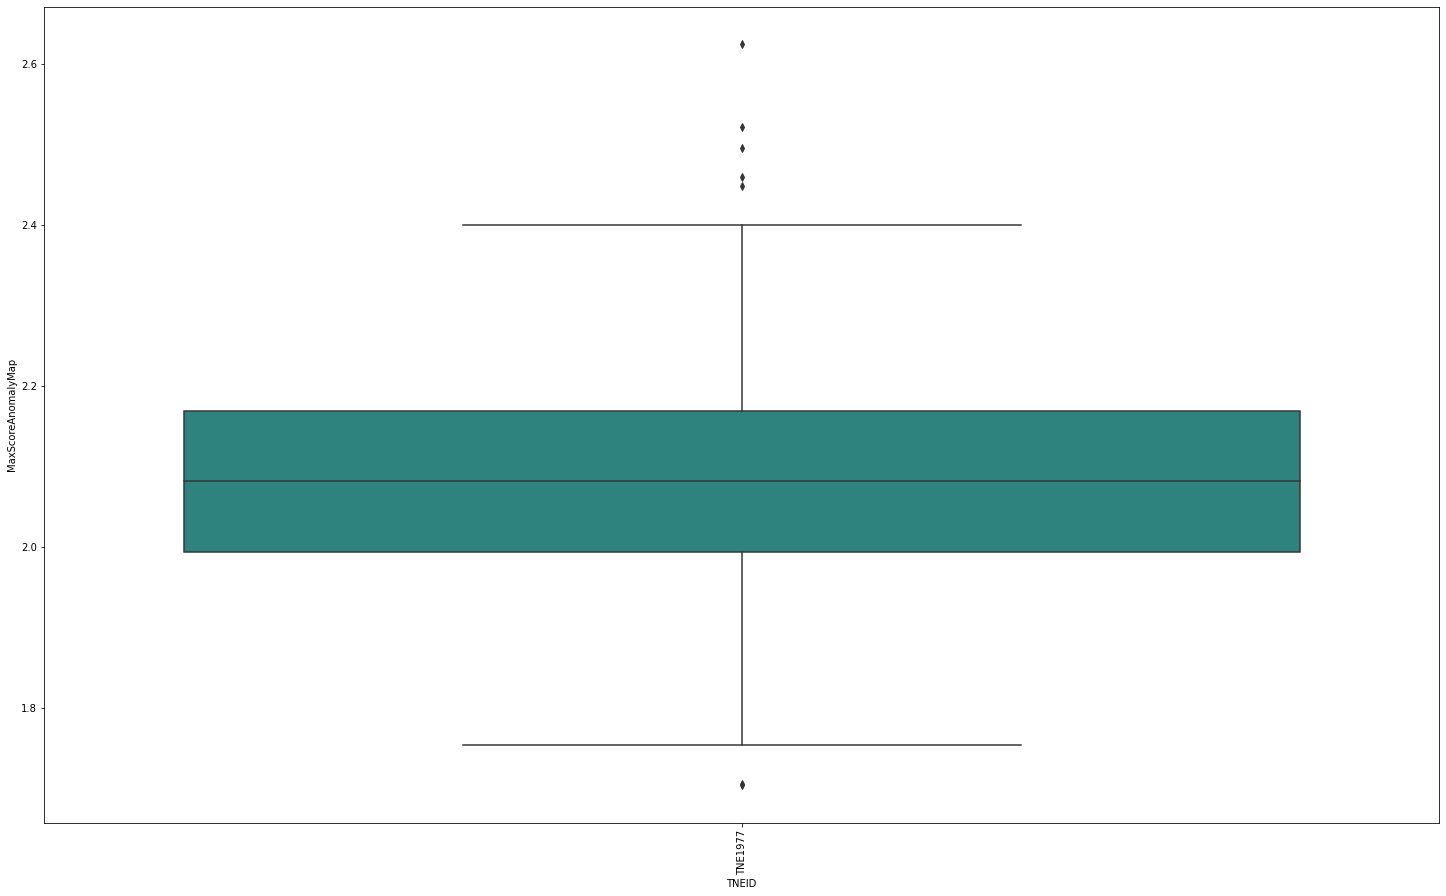

In [406]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

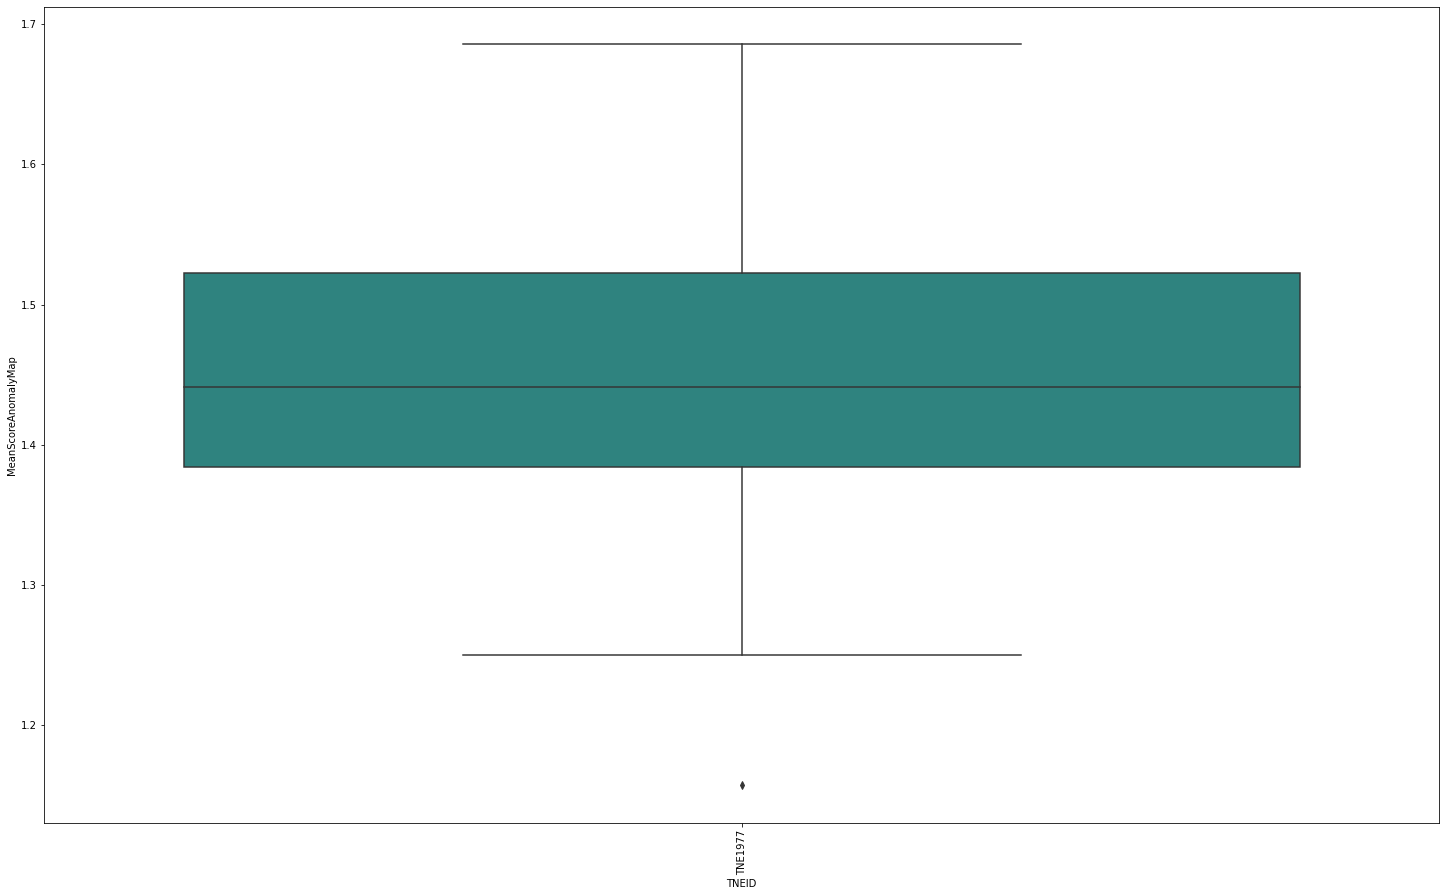

In [407]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

In [408]:
df_all_test.head()


,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,BinaryLabels
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,1,1.972825,1.457782,Test,TNE1977,Normal,0.052859,0.0
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,1,2.109298,1.407057,Test,TNE1977,Normal,0.008731,0.0
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,1,2.084627,1.432211,Test,TNE1977,Normal,0.013950,0.0
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,1,2.061749,1.549255,Test,TNE1977,Normal,0.019877,0.0
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_individual_...,1,2.136374,1.480252,Test,TNE1977,Normal,0.004404,0.0


In [428]:
threshold = np.linspace(np.min(df_all_test['MeanScoreAnomalyMap']), np.max(df_all_test['MeanScoreAnomalyMap']), 500)
precision_list = []
recall_list = []
f1_list = []
roc_list = []
FPR_list = []
TPR_list = []
specifity_list = []
sensitivity_list = []
print(len(threshold))
#df_299 = df_299[(df_299['TNEID'] == 'TNE0001') | (df_299['TNEID'] == 'TNE0803')]
df_MaxAnomalyScore = df_all_test['MeanScoreAnomalyMap']
df_exp_label = df_all_test['BinaryLabels']
for j in range(len(threshold)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    emp_label = []

    for i in range(df_all_test.shape[0]):
        MSEFM = df_MaxAnomalyScore.iloc[i]
        exp_label = df_exp_label.iloc[i]
        if MSEFM <= threshold[j]:
            empirique_label = 0
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TN += 1
            else:
                FN += 1
        else:
            empirique_label = 1
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TP += 1
            else:
                FP += 1
    try :
        precision = TP / (TP + FP)
    except:
        precision = 0
    try:
        recall = TP / (TP + FN) #sensibilite 
    except:
        recall = 0
    try:
        sprecificite = TN / (TN+FP)
    except:
        sprecificite = 0
    try:
        sensitivity = TP/ (TP+FN)
    except:
        sensitivity = 0
    try:
        TPR = TP / (TP + FN)
    except:
        TPR = 0
    try:
        spe = TN/(TN + FP)
    except :
        spe = 0
    try:
        FPR = FP / (FP + TN)
    except:
        FPR = 0
    FPR_list.append(FPR)
    TPR_list.append(TPR)
    specifity_list.append(spe)
    sensitivity_list.append(sensitivity)
    y_true = np.array(df_exp_label.tolist())
    y_scores = np.array(emp_label)
    #roc = roc_auc_score(y_true,y_scores) # ?????
    
    precision_list.append(precision)
    recall_list.append(recall)
    #roc_list.append(roc)

500


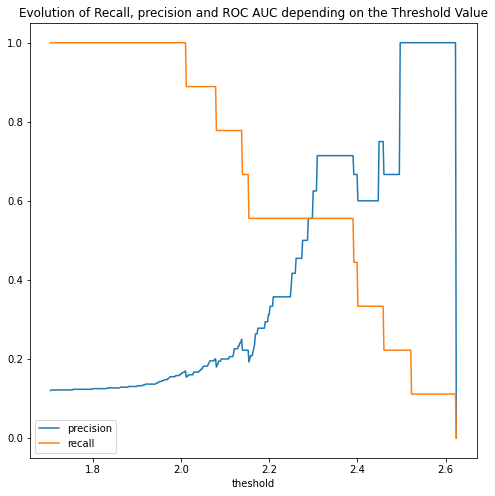

In [429]:
plt.figure(figsize=(8,8))
plt.plot(threshold, precision_list, label='precision')
plt.plot(threshold, recall_list, label='recall')
#plt.plot(threshold, roc_list, label='roc_auc')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

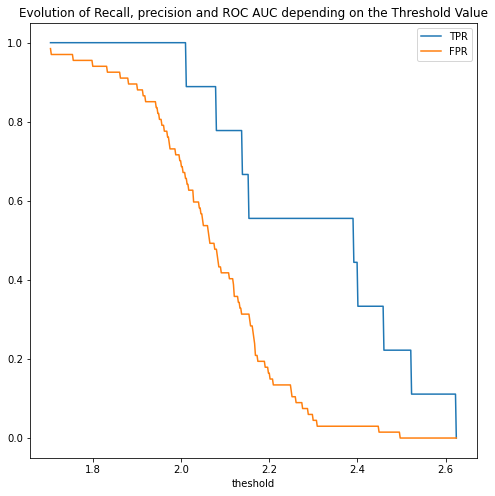

In [430]:
plt.figure(figsize=(8,8))
plt.plot(threshold, TPR_list, label='TPR')
plt.plot(threshold, FPR_list, label='FPR')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

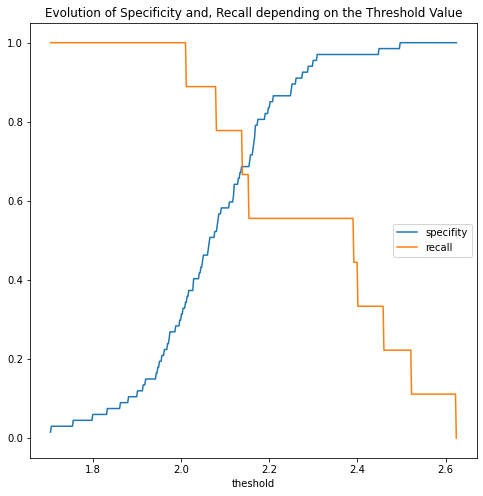

In [431]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='recall')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

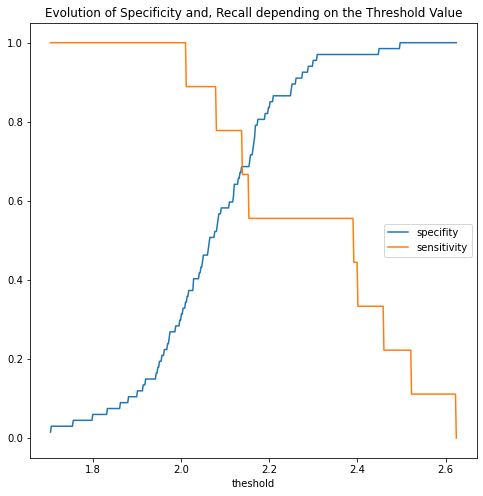

In [432]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='sensitivity')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

No handles with labels found to put in legend.


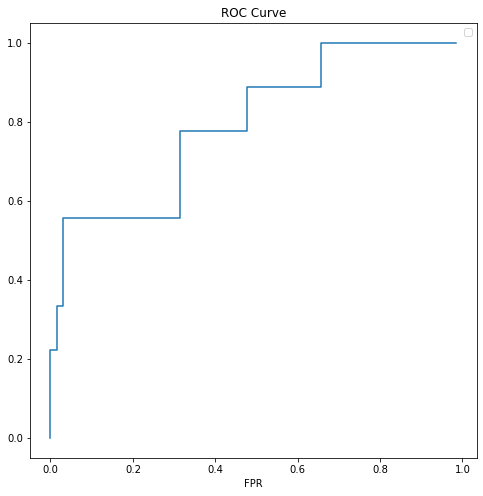

In [433]:
# ROC Curve
plt.figure(figsize=(8,8))
plt.plot(FPR_list, TPR_list)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.show()

No handles with labels found to put in legend.


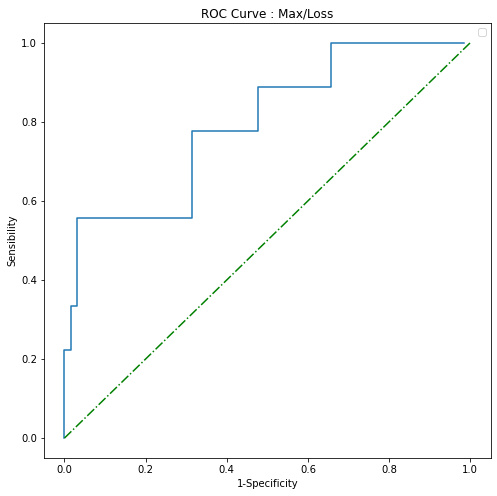

In [434]:
# ROC Curve
x = np.linspace(0,1,100)
y = x
plt.figure(figsize=(8,8))
plt.plot( 1- np.array(specifity_list) , sensitivity_list)
plt.plot(x, y,'-.g')
plt.legend()
plt.title('ROC Curve : Max/Loss')
plt.xlabel('1-Specificity')
plt.ylabel('Sensibility')

plt.show()

## Youden Index

In [435]:
df_metric = pd.DataFrame()
df_metric['threshold'] = threshold
df_metric['Recall'] = TPR_list
df_metric['FPR'] = FPR_list
df_metric['Precison'] = precision_list
df_metric['Specifity'] = specifity_list
df_metric['Sensitivity'] = sensitivity_list
df_metric['Recall/Specifity'] = np.array(TPR_list)/ np.array(specifity_list)

In [436]:
df_metric[(df_metric['Specifity'] < 0.95)&(df_metric['Specifity'] > 0.9)]

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity
302,2.261038,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
303,2.262882,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
304,2.264726,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
305,2.266569,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
306,2.268413,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
307,2.270257,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
308,2.272100,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
309,2.273944,0.555556,0.089552,0.454545,0.910448,0.555556,0.610200
310,2.275788,0.555556,0.074627,0.500000,0.925373,0.555556,0.600358
311,2.277632,0.555556,0.074627,0.500000,0.925373,0.555556,0.600358


In [437]:
df_metric['YoudenIndex'] = df_metric['Sensitivity'] + df_metric['Specifity'] -1

+ Pr = TP / (TP + FP)
+ Recall = TP  / (TP + FN)


In [438]:
df_metric.head()

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
0,1.704239,1.0,0.985075,0.120000,0.014925,1.0,67.0,0.014925
1,1.706082,1.0,0.970149,0.121622,0.029851,1.0,33.5,0.029851
2,1.707926,1.0,0.970149,0.121622,0.029851,1.0,33.5,0.029851
3,1.709770,1.0,0.970149,0.121622,0.029851,1.0,33.5,0.029851
4,1.711614,1.0,0.970149,0.121622,0.029851,1.0,33.5,0.029851


In [439]:
youden_threshold = df_metric[df_metric['YoudenIndex'] == max(df_metric['YoudenIndex'])]['threshold'].values

In [440]:
youden_threshold

array([2.30897452, 2.31081822, 2.31266193, 2.31450564, 2.31634934,
       2.31819305, 2.32003676, 2.32188046, 2.32372417, 2.32556788,
       2.32741158, 2.32925529, 2.33109899, 2.3329427 , 2.33478641,
       2.33663011, 2.33847382, 2.34031753, 2.34216123, 2.34400494,
       2.34584865, 2.34769235, 2.34953606, 2.35137977, 2.35322347,
       2.35506718, 2.35691089, 2.35875459, 2.3605983 , 2.362442  ,
       2.36428571, 2.36612942, 2.36797312, 2.36981683, 2.37166054,
       2.37350424, 2.37534795, 2.37719166, 2.37903536, 2.38087907,
       2.38272278, 2.38456648, 2.38641019, 2.3882539 , 2.3900976 ])

In [441]:
youden_threshold[0]

2.3089745171155482

In [442]:
with open(outfilename, 'a') as file:
    file.write('youden_threshold = {} \n'.format(youden_threshold[0]))
    file.close()

In [443]:
max(df_metric['YoudenIndex'])

0.525704809286899

In [444]:
with open(outfilename, 'a') as f:
    f.write('youden score = {} \n '.format(max(df_metric['YoudenIndex'])))

In [445]:
df_metric[(df_metric['Recall'] < 1) & (df_metric['Recall'] > 0.95)]

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex


In [446]:
#youden_threshold = -0.000012